In [46]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dframe= pd.read_csv('C:/Users/Harsh/Desktop/npcl.5_id_data.csv')

In [3]:
id=dframe['location_id'].unique()

In [4]:
# dframe.columns

In [5]:
d_frame=dframe[['data.grid_reading_kwh','data.grid_kwh_unit','data.creation_time','data.status',
'data.meter_sr_no','data.error_reason','data.R_voltage','data.Y_volatge',
'data.B_voltage', 'data.r_current', 'data.y_current','data.b_current','site_id',
'location_id','data.cumm_pf','data.instant_cum_Kw', 'data.instant_cum_Kva','data.frequency']]

In [6]:
# combined_df['data.cumm_pf'].plot(figsize=(18,5))

checks

In [7]:
# Status "P"
combined_df=d_frame[d_frame['data.status']== "P"]

#no consumption
combined_df.loc[combined_df['data.error_reason'] == 'No Consumption', 'data.grid_kwh_unit'] = 0

# null values
if combined_df.isnull().sum().sum()>0:
    combined_df.dropna(inplace=True)

# special character
def special_char():
    special_character_pattern = r'[!@#$%^&*()]'
    rows_with_special_chars = combined_df[combined_df['location_id'].str.contains(special_character_pattern, regex=True)]
    return ( rows_with_special_chars)
if combined_df['location_id'].dtype != 'int64':
    special_char()

#  creation time relabelling 
# combined_df['data.creation_time']=pd.to_datetime(combined_df['data.creation_time'])

# integer conversion
combined_df['data.grid_reading_kwh']=combined_df['data.grid_reading_kwh'].round()

In [13]:
final_lst=[]
for each_id in id:
    df=combined_df[combined_df['location_id'] == each_id ]
    df['data.creation_time']=pd.to_datetime(df['data.creation_time'])
    df.set_index(['data.creation_time'],drop=True, inplace=True)
    
    # dfresample=df[['data.grid_reading_kwh']].resample(rule='1H').max()

    # df['units']=round((df['data.grid_reading_kwh']-df['data.grid_reading_kwh'].shift(1)),2)
    # df.dropna(inplace=True)
    # df = df[df['units'] >= 0]
    df_resample=df[['data.grid_reading_kwh']].resample(rule='1H').max()
    df_resample['data.grid_reading_kwh'].interpolate(inplace=True)
    df_resample['grid_reading']=round(df_resample['data.grid_reading_kwh'])
    df_resample['unit']=df_resample['grid_reading']-df_resample['grid_reading'].shift(1)
    df_resample = df_resample[df_resample['unit'] >= 0]
    df_resample.drop(['data.grid_reading_kwh'],axis=1,inplace=True)
    
    

    final_lst.append(df_resample)

final_df = pd.concat(final_lst)

In [14]:
df=final_lst[4]

In [44]:
combined_df

,data.grid_reading_kwh,data.grid_kwh_unit,data.creation_time,data.status,data.meter_sr_no,data.error_reason,data.R_voltage,data.Y_volatge,data.B_voltage,data.r_current,data.y_current,data.b_current,site_id,location_id,data.cumm_pf,data.instant_cum_Kw,data.instant_cum_Kva,data.frequency
0,164.0,0.0,2021-05-01 00:01:42,P,DAL0000950,No Consumption,234.7,239.6,228.4,1.30,0.00,0.83,6075bb51153a20.38235471,500000010232,0.98,0.38,0.39,50.2
1,164.0,0.0,2021-05-01 00:03:46,P,DAL0000950,No Consumption,235.2,239.4,226.7,1.19,0.00,0.83,6075bb51153a20.38235471,500000010232,0.98,0.37,0.37,50.2
2,164.0,0.0,2021-05-01 00:05:50,P,DAL0000950,No Consumption,235.2,239.4,226.7,1.19,0.00,0.83,6075bb51153a20.38235471,500000010232,0.98,0.37,0.37,50.2
3,164.0,0.0,2021-05-01 00:07:57,P,DAL0000950,No Consumption,234.6,238.2,227.9,1.19,0.00,0.82,6075bb51153a20.38235471,500000010232,0.98,0.37,0.37,50.1
4,164.0,0.0,2021-05-01 00:10:02,P,DAL0000950,No Consumption,234.6,238.2,227.9,1.19,0.00,0.82,6075bb51153a20.38235471,500000010232,0.98,0.37,0.37,50.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301168,21680.0,1.0,2023-08-17 23:17:09,P,DAL0000997,Success,234.8,232.3,224.5,7.83,0.04,1.11,6075bb51153a20.38235471,500000010032,1.00,2.07,2.07,50.1
1301169,21680.0,0.0,2023-08-17 23:26:52,P,DAL0000997,No Consumption,236.7,233.6,224.6,7.78,0.00,0.47,6075bb51153a20.38235471,500000010032,0.99,1.91,1.91,50.0
1301170,21681.0,1.0,2023-08-17 23:36:34,P,DAL0000997,Success,237.2,233.7,229.9,7.72,0.00,0.72,6075bb51153a20.38235471,500000010032,0.99,1.97,1.97,50.2
1301171,21681.0,0.0,2023-08-17 23:46:20,P,DAL0000997,No Consumption,237.7,232.7,228.6,7.72,0.00,0.72,6075bb51153a20.38235471,500000010032,0.99,1.97,1.97,50.1


In [17]:
df['moving_avg'] = df['unit'].rolling(window=24).mean()


<Axes: xlabel='data.creation_time'>

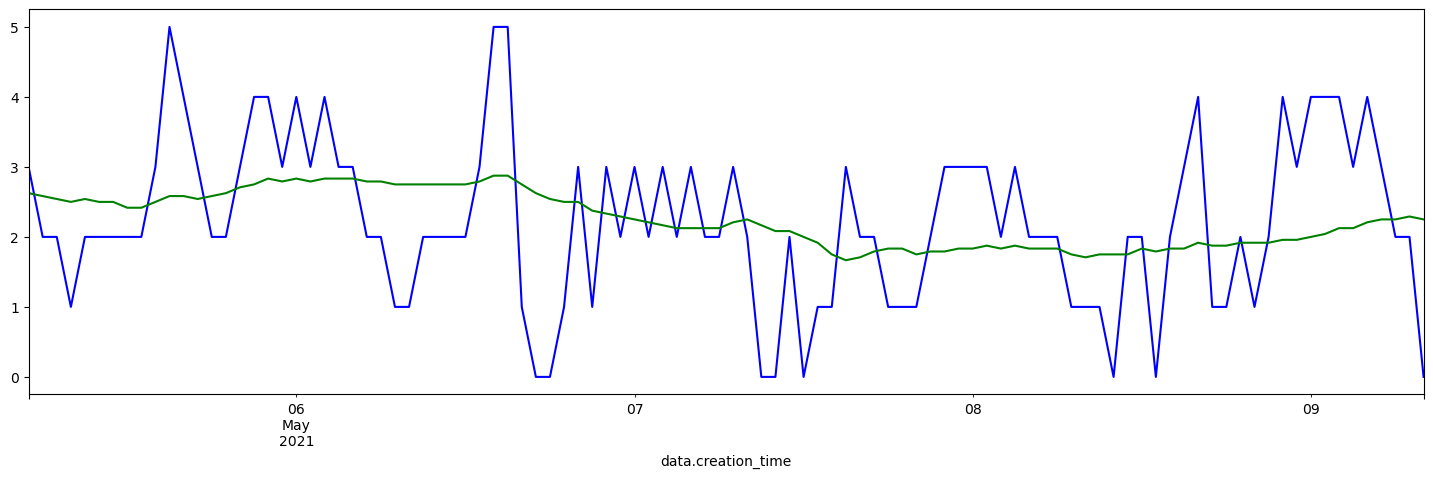

In [21]:
df['unit'][100:200].plot(figsize=(18,5),color='b')
df['moving_avg'][100:200].plot(figsize=(18,5),color='g')


In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing,Holt

In [77]:
add_resut=seasonal_decompose(df['unit'],model='additive',period=24)
df['seasonal']=add_resut.seasonal
df['trend']=add_resut.trend
df['residual']=add_resut.resid
df['actual_unit']=add_resut.observed

Text(0.5, 0.98, '\n additive')

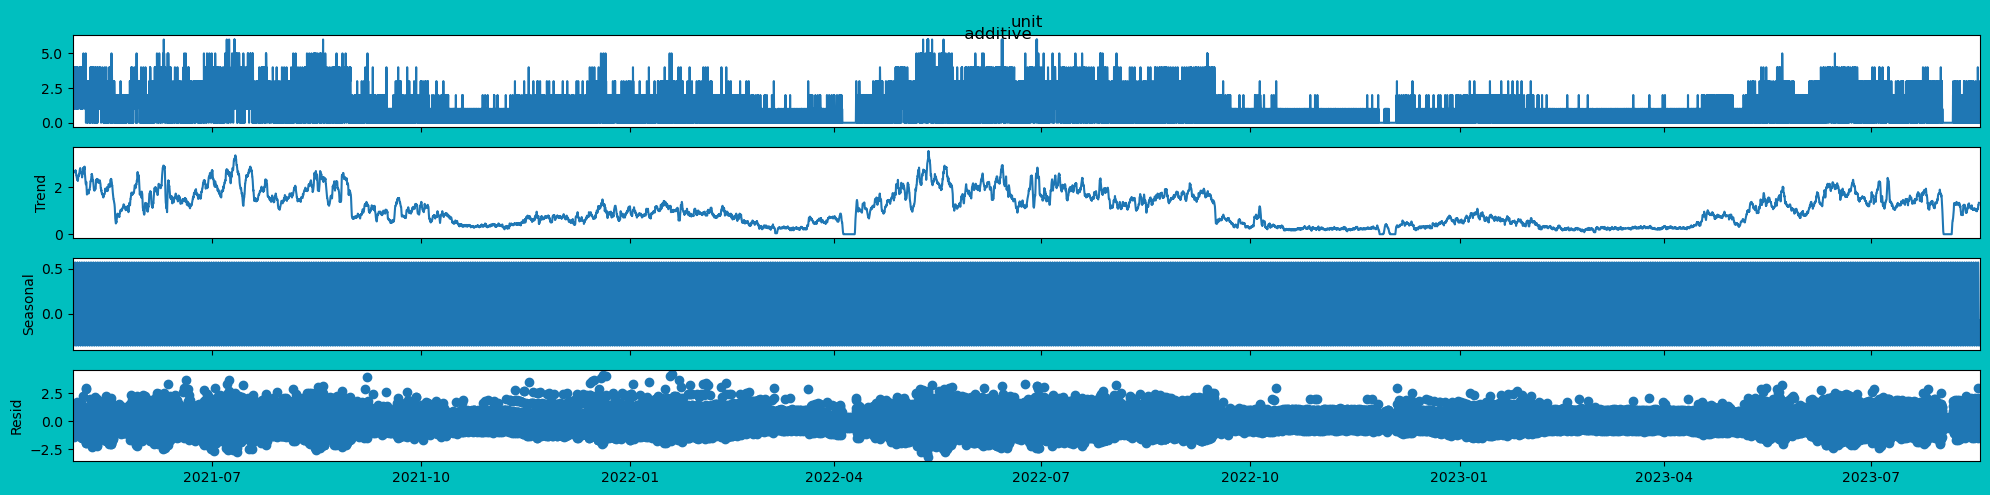

In [78]:
add_resut.plot().suptitle('\n additive',fontsize=12)

In [41]:
test_result=adfuller(df['unit'],autolag='AIC')

In [43]:
test_result

(-5.3311194863463145,
 4.7188155725395115e-06,
 46,
 20084,
 {'1%': -3.430675639115047,
  '5%': -2.861683921077168,
  '10%': -2.5668466052510746},
 44407.69597420099)